1.Get 1-day trading data (open, close, high, low and volume) with 1 minute interval for Therma Bright Inc. (THRM.V).   
Plot candle stick plot and VWAP in one figure using the 1-day data above.  [20 points]
(10 points for candle stick plot and 10 points for VWAP) 

<ipython-input-15-46fa71d12874>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


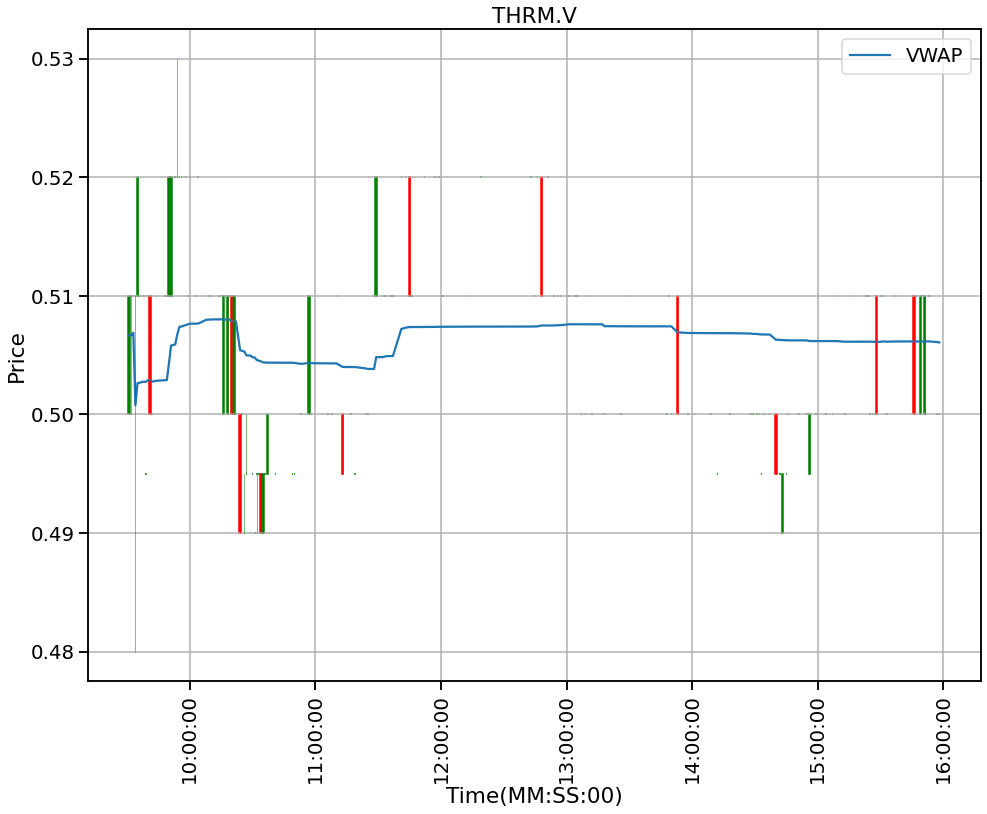

In [15]:
import requests
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
ticker = 'THRM.V'
base_url = 'https://query1.finance.yahoo.com'
url = f'https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?&interval=1m'
response = requests.get(url=url)
data = response.json()
epoch = data['chart']['result'][0]['timestamp']
open = data['chart']['result'][0]['indicators']['quote'][0]['open']
high = data['chart']['result'][0]['indicators']['quote'][0]['high']
low = data['chart']['result'][0]['indicators']['quote'][0]['low']
close = data['chart']['result'][0]['indicators']['quote'][0]['close']
volume = data['chart']['result'][0]['indicators']['quote'][0]['volume']

count = 0
list_of_time_and_price = []
for entry in epoch:
    date_and_time = dt.datetime.fromtimestamp(entry).strftime('%Y-%m-%d %H:%M:%S')
    list_of_time_and_price.append([date_and_time, open[count],high[count],low[count],close[count],volume[count]])
    count += 1

df = pd.DataFrame(list_of_time_and_price, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
# Average Price: (  High + Low + Close)/3
df['average_price'] = (df['high'] + df['low'] + df['close']) / 3
df['open'].replace('', np.nan, inplace=True)
df['high'].replace('', np.nan, inplace=True)
df['low'].replace('', np.nan, inplace=True)
df['close'].replace('', np.nan, inplace=True)
df['volume'].replace('', np.nan, inplace=True)
df['volume'].replace(0, np.nan, inplace=True)
df = df.dropna()
df['vwap'] = (df.volume*df.average_price).cumsum() / df.volume.cumsum()

# if necessary convert to datetime
df.date = pd.to_datetime(df.date)
df.date = df.date.apply(mdates.date2num)

# Plot candlestick chart
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.xaxis_date()
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax2.plot(df.date, df['vwap'], label='VWAP')
plt.xlabel("Time(MM:SS:00)")
plt.ylabel("Price")
plt.title(ticker)
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=90)
candlestick_ohlc(ax1, df.values, width=0.0005, colorup='g', colordown='r')
plt.show()

2.Get daily trading data (open, close, high, low and volume) from 2018-01-01 to 2020-12-31 for Therma Bright Inc. (THRM.V).  
Plot candle stick plot and 30-day and 100-day exponential moving averages on one figure. [20 points]
(10 points for candle stick plot and 10 points for moving averages)

In [46]:
import requests
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates

 
data = pd.read_csv('THRM.V.csv', parse_dates=['Date'], index_col=['Date'])
data = data.sort_index()
data['Num_date'] = matplotlib.dates.date2num(data.index)
data['ewm30'] = data['Close'].ewm(span=30,min_periods=0,adjust=False,ignore_na=False).mean()
data['ewm100'] = data['Close'].ewm(span=100,min_periods=0,adjust=False,ignore_na=False).mean()
data

,Open,High,Low,Close,Adj Close,Volume,Num_date,ewm30,ewm100
Date,,,,,,,,,
2018-01-02,0.080,0.085,0.075,0.075,0.075,159666.0,17533.0,0.075000,0.075000
2018-01-03,0.080,0.080,0.070,0.075,0.075,718160.0,17534.0,0.075000,0.075000
2018-01-04,0.070,0.075,0.065,0.070,0.070,693152.0,17535.0,0.074677,0.074901
2018-01-05,0.070,0.070,0.065,0.065,0.065,474965.0,17536.0,0.074053,0.074705
2018-01-08,0.065,0.080,0.065,0.080,0.080,1068350.0,17539.0,0.074437,0.074810
...,...,...,...,...,...,...,...,...,...
2020-12-23,0.210,0.215,0.200,0.210,0.210,1138245.0,18619.0,0.157283,0.125668
2020-12-24,0.220,0.230,0.210,0.225,0.225,2114075.0,18620.0,0.161652,0.127635
2020-12-29,0.235,0.235,0.205,0.225,0.225,5004639.0,18625.0,0.165739,0.129563


<ipython-input-47-2957b6aeeba3>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)
<ipython-input-47-2957b6aeeba3>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(111)


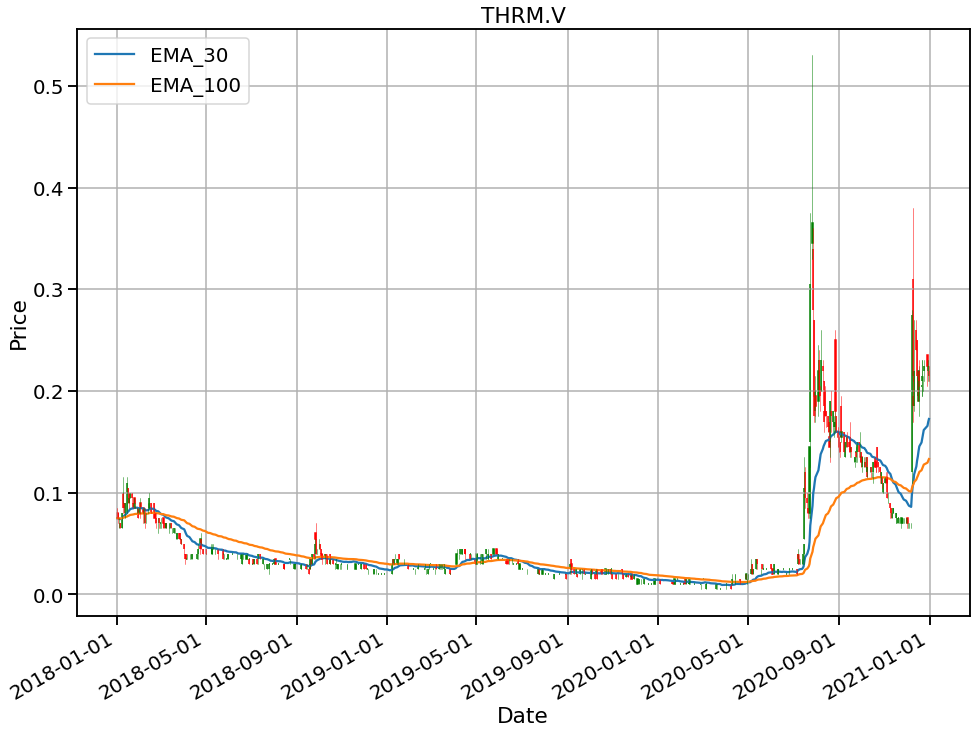

In [47]:
#Plot candlestick chart
ticker='THRM.V'
ohlc_data = data[['Num_date','Open','High','Low','Close']].values

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax2.plot(data.index, data['ewm30'], label='EMA_30')
ax3.plot(data.index, data['ewm100'], label='EMA_100')
# Setting labels  
plt.xlabel('Date') 
plt.ylabel("Price")
plt.title(ticker)

plt.legend(loc='best')
plt.xticks(rotation=90)
#candlestick_ohlc(ax1, ohlc_data, width=1, colorup='g', colordown='r')
candlestick_ohlc(ax1, ohlc_data, alpha=1, colorup='g', colordown='r')


ax1.grid(True)
#ax1.xaxis_date()
ax1.figure.autofmt_xdate()
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.show()

3.Use the same data in Question 2. 
(1) Calculate daily return (return = log(today close/previous close)) [5 points]
(2) Conduct the hypothesis testing to check if the distribution of daily return is normal.  [15 points]

Date
2018-01-03    0.000000
2018-01-04   -0.068993
2018-01-05   -0.074108
2018-01-08    0.207639
2018-01-09    0.223144
Name: Log Return, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Log Return'>

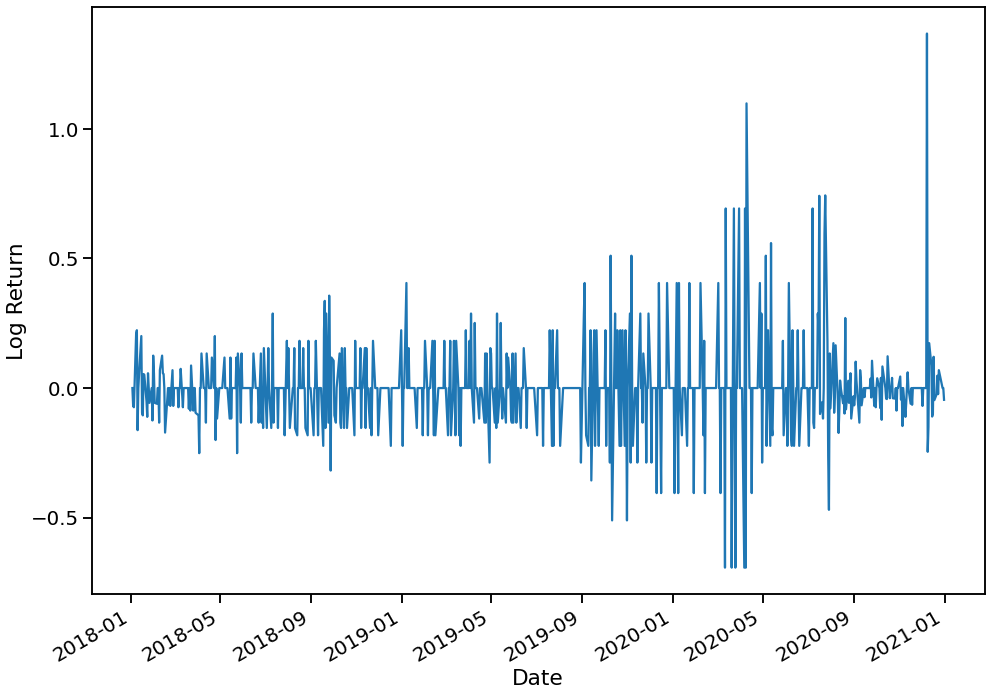

In [48]:
import numpy as np
df = data
df['Close_Yesterday'] = df['Close'].shift()
df['Log Return'] = np.log(df['Close'] / df['Close_Yesterday'])
log_return = df['Log Return']
log_return = log_return.dropna()
print(log_return.head())
fig = plt.figure(figsize=(16, 12))
plt.ylabel("Log Return")
plt.xlabel('Date') 
log_return.plot()

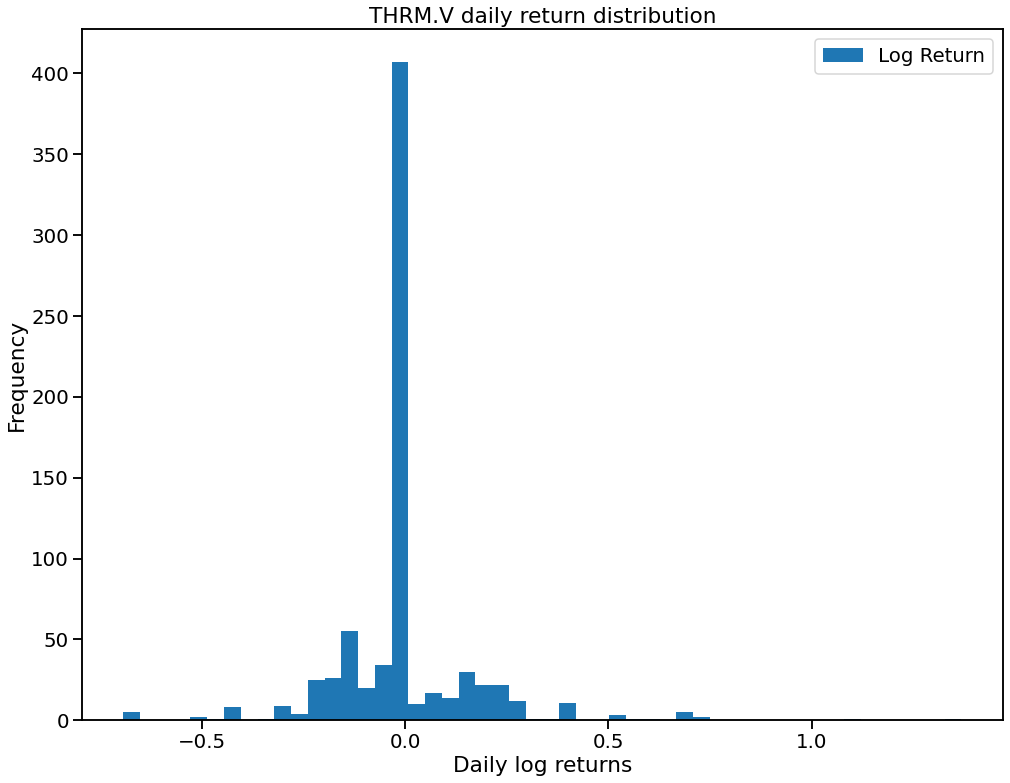

In [49]:
fig = plt.figure(figsize=(16, 12))
# makes the figure 10% from the left of the figure, 10% from the bottom of the figure, 80% width of the figure, and 80% height of the figure.
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
log_return.plot.hist(bins=50, alpha=1)
ax1.set_xlabel("Daily log returns")
ax1.set_ylabel("Frequency")
ax1.set_title("THRM.V daily return distribution")
plt.legend(loc='best')
plt.show()

In [50]:
import scipy.stats as stats
print(log_return.describe())
# mean
u = log_return.mean()
# std
std = log_return.std()
print('')
print('scipy.stats.kstest stats test result：----------------------------------------------------')
print(stats.kstest(log_return, 'norm', (u, std)))
print('')
print('scipy.stats.normaltest stats test result：----------------------------------------------------')
print(stats.normaltest(log_return))
print('')
print('scipy.stats.shapiro stats test result：----------------------------------------------------')
print(stats.shapiro(log_return))

count    751.000000
mean       0.001451
std        0.174703
min       -0.693147
25%       -0.035729
50%        0.000000
75%        0.000000
max        1.368276
Name: Log Return, dtype: float64

scipy.stats.kstest stats test result：----------------------------------------------------
KstestResult(statistic=0.2982529092769721, pvalue=9.979642277601558e-60)

scipy.stats.normaltest stats test result：----------------------------------------------------
NormaltestResult(statistic=278.6157066909906, pvalue=3.157679199205981e-61)

scipy.stats.shapiro stats test result：----------------------------------------------------
ShapiroResult(statistic=0.7884068489074707, pvalue=4.264903401054542e-30)


The p-values of the different tests are all less than 0.05 and closed to zero, strongly rejecting the test
hypothesis that the different sample data sets are normally distributed.

4.Take 10 stocks in S&P500 and collect daily close price from 2020-06-01 to 2020-12-31 for selected stocks. 
(1)	Calculate daily return (return = log(today close/previous close)) for each of 10 stocks [5 points]
(2)	Run PCA on calculated daily return and find the first principal component. [15 points]
(3)	Plot first principal component and daily return of S&P500 in one figure[10 points]
(4)	Calculate the correlation coefficient between first principal component and daily return of S&P500 index. [10 points]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG","MSFT", "TSLA", "JPM", "NVDA", "JNJ" ]
multpl_stocks = web.get_data_yahoo(tickers,
start = "2020-06-01",
end = "2020-12-31")
multpl_stocks.to_csv('multpl_stocks.csv', index=True)
multpl_stocks
df1 = multpl_stocks['Adj Close']
df2 = df1.shift()
df3 = np.log(df2 / df1)
df3

Symbols,FB,AMZN,AAPL,NFLX,GOOG,MSFT,TSLA,JPM,NVDA,JNJ
Date,,,,,,,,,,
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02,-0.003487,-0.000554,-0.004619,-0.003258,-0.005155,-0.011312,0.018588,-0.003341,-0.002155,-0.007176
2020-06-03,0.011061,-0.002420,-0.005490,0.012576,0.001975,-0.002431,-0.001587,-0.052571,0.006337,-0.002694
2020-06-04,0.016957,0.007208,0.008649,0.018271,0.016991,0.013251,0.021267,-0.020598,-0.000114,0.013000
2020-06-05,-0.019604,-0.009062,-0.028083,-0.012639,-0.018390,-0.023129,-0.024321,-0.044019,-0.017358,-0.003877
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.002652,0.003957,-0.007683,0.000992,-0.003728,-0.007797,-0.024150,0.004407,0.001192,-0.003482
2020-12-28,-0.035272,-0.034470,-0.035141,-0.009970,-0.021190,-0.009873,-0.002897,-0.006564,0.007241,-0.004711
2020-12-29,0.000795,-0.011517,0.013404,-0.022382,0.009828,0.003607,-0.003459,0.002636,-0.003347,-0.006182


<AxesSubplot:title={'center':'10 Stocks Daily Return'}, xlabel='Date', ylabel='Daily Return'>

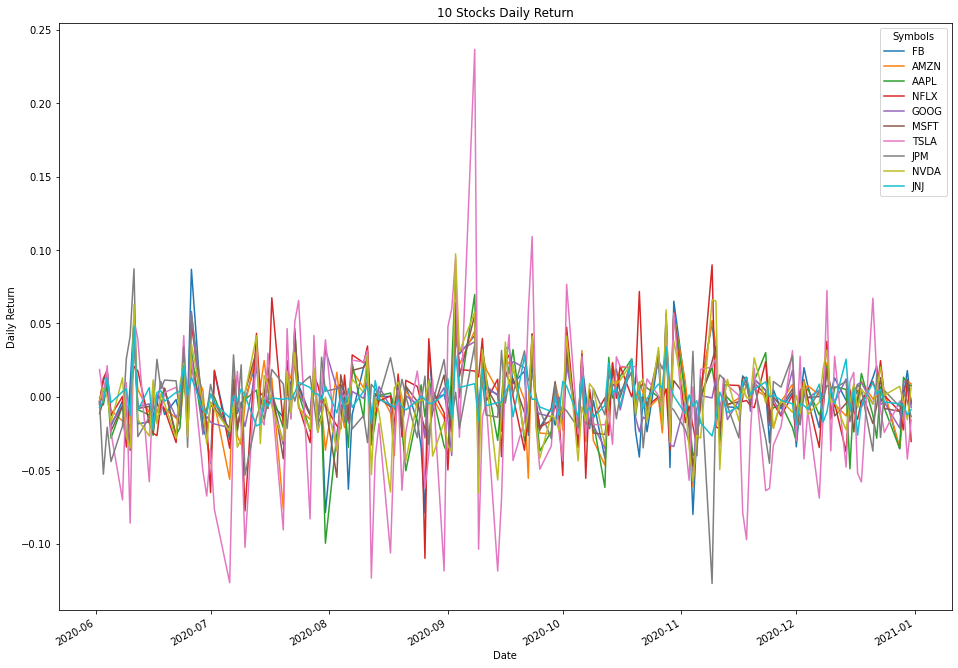

In [3]:
df3.plot(figsize=(16, 12) , title= '10 Stocks Daily Return' , xlabel = 'Date' , ylabel = 'Daily Return')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

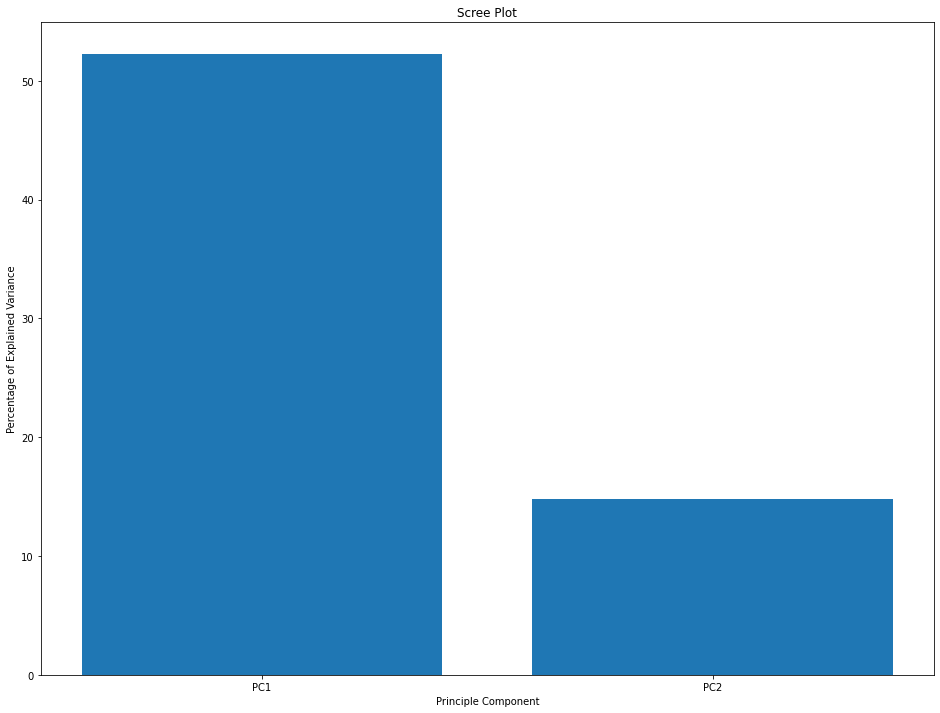

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = df3.dropna()
# Standardizing the features
x = StandardScaler().fit_transform(data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels=['PC1','PC2']
principalDf = pd.DataFrame(data = principalComponents, columns = labels)
fig = plt.figure(figsize=(16, 12))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

Calculate correlation:
------------------------------
[[ 1.         -0.81748353]
 [-0.81748353  1.        ]]
correlation: -0.8174835309665697


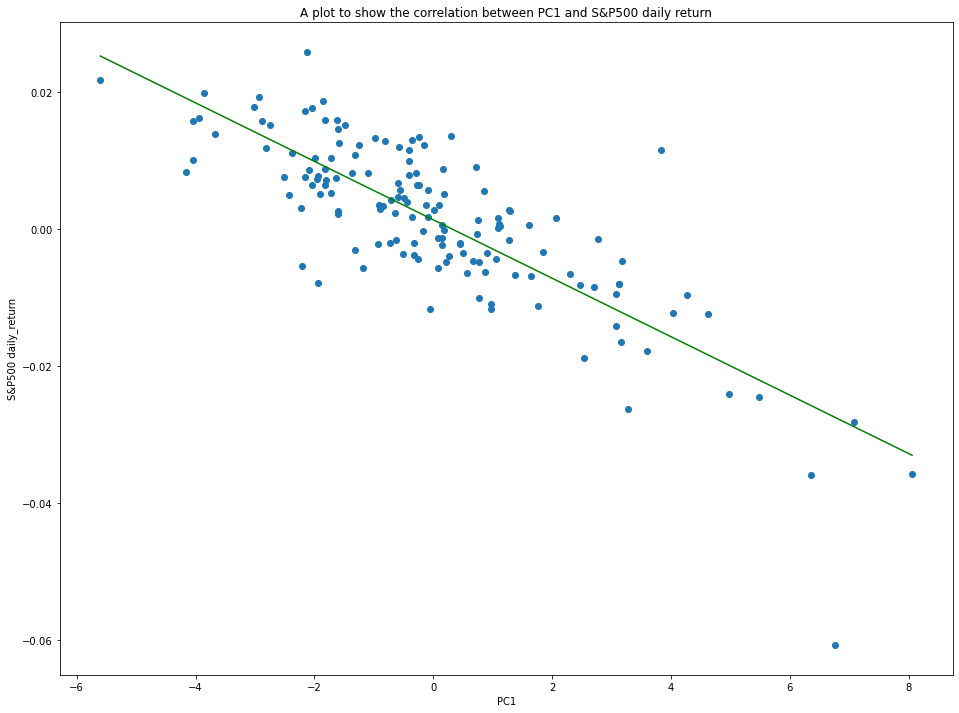

In [9]:
SP500 = pd.read_csv('^GSPC.csv', parse_dates=['Date'], index_col=['Date'])
# SP500['log_ret'] = np.log(SP500.Close) - np.log(SP500.Close.shift(1))
SP500['daily_return'] = np.log(SP500.Close / SP500.Close.shift(1)) 
SP500 = SP500.dropna()
SP500.insert(7, "PC1", principalDf['PC1'].values, True) 
x=SP500['PC1']
y=SP500['daily_return']
print('Calculate correlation:')
print(30*'-')
print(np.corrcoef(x, y))
print(f'correlation: {np.corrcoef(x,y)[1,0]}')

fig = plt.figure(figsize=(16, 12))
plt.scatter(x, y) 
plt.title('A plot to show the correlation between PC1 and S&P500 daily return')
plt.xlabel('PC1')
plt.ylabel('S&P500 daily_return')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.show()

5.Pick 2 companies in the same industry, collect close, open, high and low for each company from 2020-06 to 2020-12.
Variable set 1 = company A’s close, open, high and low
Variable set 2 = company B’s close, open, high and low  
[10 points]
(1)Run canonical analysis using data stated above
(2)Give some conclusion or findings from your analysis

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-06-01 -0.687443 -0.633605 -0.591752 -0.588997  -0.683057 -0.308143
2020-06-02 -0.427836 -0.539692 -0.535066 -0.555156  -0.651063  0.519815
2020-06-03 -0.294440 -0.075289 -0.212472 -0.007555  -0.133338  1.172763
2020-06-04 -0.064591  0.099121 -0.034169  0.214973   0.077049  1.288822
2020-06-05  1.075425  1.044440  0.660489  0.706174   0.541451  3.413859
(150, 6)
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-06-01 -0.764592 -0.640097 -0.697481 -0.594321  -0.712232 -0.147728
2020-06-02 -0.416524 -0.371019 -0.437100 -0.476610  -0.600368  0.438627
2020-06-03 -0.140115  0.017076 -0.013343  0.111945  -0.041053  1.157686
2020-06-04 -0.032623  0.374123  0.078557  0.516257   0.434007  1.516638
2020-06-05  1.625826  1.502186  1.257929  1.196934   1.

Text(0.5, 1.0, 'Comp. 1, corr = 0.97')

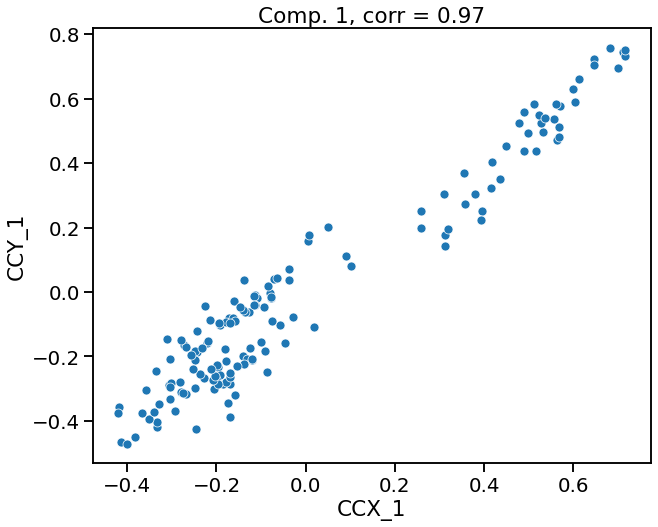

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_decomposition import CCA


X = pd.read_csv('JPM.csv', parse_dates=['Date'], index_col=['Date'])
X = X.sort_index()
X = X.dropna()
X_mc = (X-X.mean())/(X.std())
print(X_mc.head())
print(X_mc.shape)

Y = pd.read_csv('BAC.csv', parse_dates=['Date'], index_col=['Date'])
Y = Y.sort_index()
Y = Y.dropna()
Y_mc = (Y-Y.mean())/(Y.std())
print(Y_mc.head())
print(Y_mc.shape)

# instantiate CCA object and use fit() and transform() functions with the two standardized matrices to perform CCA.
ca = CCA()
ca.fit(X_mc, Y_mc)

# Apply the dimension reduction , return X_scores, Y_scores
X_c, Y_c = ca.transform(X_mc, Y_mc)
print(X_c.shape)
print(Y_c.shape)

cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1]})
print(cc_res.head())

# NumPy’s corrcoef() function to compute the correlation between the first pair of covariates
print(np.corrcoef(X_c[:, 0], Y_c[:, 0]))

# NumPy’s corrcoef() function to compute the correlation between the 2nd pair of covariates
print(np.corrcoef(X_c[:, 1], Y_c[:, 1]))

# make scatter plot with the first pair of canonical covariates
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

Text(0.5, 1.0, 'Comp. 2, corr = 0.91')

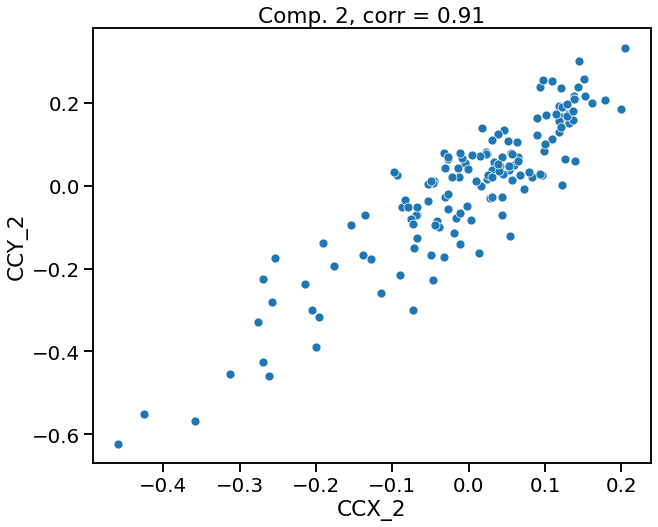

In [57]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                data=cc_res)
plt.title('Comp. 2, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])

Conclusion: high postive corelation bewteen the two stock: JPM and BAC